In [ ]:
# 11/04/2025
# CSC354 – Assignment2 – ML – Concept Learning
# Muhammad Taha, Nimra Shahid
# FA22-BCS-119, 123
# Implementation of Elbow Method in K-means Algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

: 


🔁 Iteration 1
R1 assigned to C1 (d1=0.00, d2=7.21)
R2 assigned to C1 (d1=1.12, d2=6.10)
R3 assigned to C2 (d1=3.61, d2=3.61)
R4 assigned to C2 (d1=7.21, d2=0.00)
R5 assigned to C2 (d1=4.72, d2=2.50)
R6 assigned to C2 (d1=5.32, d2=2.06)
R7 assigned to C2 (d1=4.30, d2=2.92)

📍 New centroid for C1: Mean of points in cluster
   Points: [[1.  1. ]
 [1.5 2. ]]
   → New centroid: [1.25 1.5 ]

📍 New centroid for C2: Mean of points in cluster
   Points: [[3.  4. ]
 [5.  7. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]
   → New centroid: [3.9 5.1]

🔁 Iteration 2
R1 assigned to C1 (d1=0.56, d2=5.02)
R2 assigned to C1 (d1=0.56, d2=3.92)
R3 assigned to C2 (d1=3.05, d2=1.42)
R4 assigned to C2 (d1=6.66, d2=2.20)
R5 assigned to C2 (d1=4.16, d2=0.41)
R6 assigned to C2 (d1=4.78, d2=0.61)
R7 assigned to C2 (d1=3.75, d2=0.72)

📍 New centroid for C1: Mean of points in cluster
   Points: [[1.  1. ]
 [1.5 2. ]]
   → New centroid: [1.25 1.5 ]

📍 New centroid for C2: Mean of points in cluster
   Points: [[3.  4. ]
 [5.

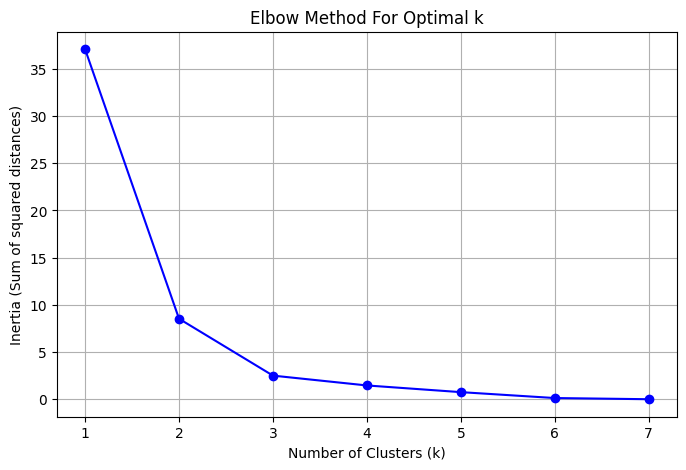

In [ ]:
data = {
    'Record': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7'],
    'A': [1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
    'B': [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]
}

df = pd.DataFrame(data)
X = df[['A', 'B']].values

centroids = {
    'C1': np.array([1.0, 1.0]),
    'C2': np.array([5.0, 7.0])
}

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


for iteration in range(2):
    print(f"\n Iteration {iteration + 1}")
    clusters = {'C1': [], 'C2': []}
    cluster_assignments = []

    
    for i, point in enumerate(X):
        d_c1 = euclidean_distance(point, centroids['C1'])
        d_c2 = euclidean_distance(point, centroids['C2'])

        if d_c1 < d_c2:
            clusters['C1'].append(point)
            cluster_assignments.append('C1')
            print(f"{df['Record'][i]} assigned to C1 (d1={d_c1:.2f}, d2={d_c2:.2f})")
        else:
            clusters['C2'].append(point)
            cluster_assignments.append('C2')
            print(f"{df['Record'][i]} assigned to C2 (d1={d_c1:.2f}, d2={d_c2:.2f})")

    
    for key in clusters:
        cluster_points = np.array(clusters[key])
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean(axis=0)
            print(f"\nNew centroid for {key}: Mean of points in cluster")
            print(f"   Points: {cluster_points}")
            print(f"    New centroid: {new_centroid}")
            centroids[key] = new_centroid


In [ ]:
inertia = []
K_range = range(1, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()